In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
% matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

In [10]:
def linearFit(t, m): 
    return m*t

#defines linear fit function

In [11]:
pos = [0.3855, 0.3825, 0.376, 0.372, 0.363, 0.3525, 0.341]
t = [1, 16, 31, 46, 61, 76, 91]
S = []
d = 0.05
L = 4.83
b = 0.045
m = 1.46
y = []
x = []
dx = []
da = []
AUncert = []

for i in range(len(pos)):
    S.append(0.3855-pos[i])
for j in range(len(pos)):
    x.append(S[j]*d)
    y.append(t[j]**2*L)
    dx.append(np.sqrt(2*t[j]**2*L+(t[j]**2*0.03)**2))
    da.append(d*np.sqrt((0.0005/((t[j]**2)*L)**2)+(2*S[j]/(L*t[j]**3))**2+(0.03*d*S[j]/(L*t[j]**2))**2))
x = np.array(x)
y = np.array(y)
dx = np.array(dx)
AUncert = np.average(da)
print(AUncert)
print(da)

3.3266010181e-05
[0.00023147701630432606, 9.0433425842985147e-07, 2.4096149988590715e-07, 1.0943140144053206e-07, 6.2242197618724238e-08, 4.0105970715780321e-08, 2.7979634693601037e-08]


In [12]:
fitParams, fitCovariances = curve_fit(linearFit, y, x)
print(fitParams)
print(fitCovariances)

sigma = np.sqrt([fitCovariances[0,0]])
#print (3*sigma)

[  5.81674974e-08]
[[  4.24194143e-18]]


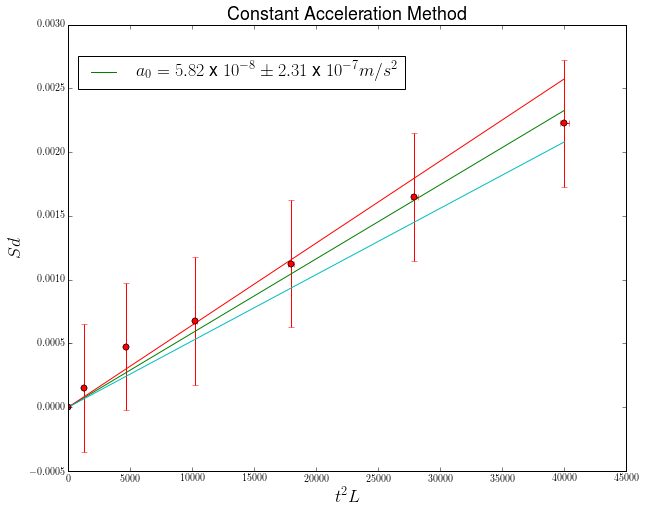

In [13]:
plt.plot(y, x, 'o')
plt.plot(y, linearFit(y, fitParams[0]), label='$a_0=5.82$ x $10^{-8} \pm 2.31$ x $10^{-7} m/s^2$')
plt.plot(y, linearFit(y, fitParams[0]+3*sigma[0]))
plt.plot(y, linearFit(y, fitParams[0]-3*sigma[0]))
plt.legend(bbox_to_anchor=(0.62,0.95), fontsize = 18)
plt.title('Constant Acceleration Method', fontsize = 18)
plt.xlabel('$t^2L$', fontsize = 18)
plt.ylabel('$Sd$', fontsize = 18)
plt.errorbar(y, x, fmt = 'ro', xerr= dx, yerr =0.0005)
plt.savefig('ConstAccel.png', bbox_inches=0, dpi=200)

In [6]:
(0.3875+0.3855+0.3825+0.376+0.372+0.363+0.3525+0.341+0.329)/9

0.36544444444444446

In [7]:
0.3875, 0.3855, 0.3825, 0.376, 0.372, 0.363, 0.3525, 0.341, 0.329
0, 15, 30, 45, 60, 75, 90, 105, 120

(0, 15, 30, 45, 60, 75, 90, 105, 120)

In [8]:
print ('G=%0.3f*10**{-11}'%(fitParams*b**2/(2*m)*10**11))

G=4.034*10**{-11}


In [ ]:
4.034*1.069